In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("heart_v2.csv")
df.head(10)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
5,65,1,120,177,0
6,56,1,130,256,1
7,59,1,110,239,1
8,60,1,140,293,1
9,63,0,150,407,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [6]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [7]:
df.rename(columns={'cholestrol':'cholesterol'},inplace=True)
df.head()

,age,sex,BP,cholesterol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
df['sex']=df['sex'].replace({0:'Female',1:'Male'})
df.head()

,age,sex,BP,cholesterol,heart disease
0,70,Male,130,322,1
1,67,Female,115,564,0
2,57,Male,124,261,1
3,64,Male,128,263,0
4,74,Female,120,269,0


In [9]:
def classify_age(age):
    if age < 40:
        return 'Young'
    elif age <= 60:
        return 'Middle-aged'
    else:
        return 'Senior'


df['age_group'] = df['age'].apply(classify_age)

df.head(5)

,age,sex,BP,cholesterol,heart disease,age_group
0,70,Male,130,322,1,Senior
1,67,Female,115,564,0,Senior
2,57,Male,124,261,1,Middle-aged
3,64,Male,128,263,0,Senior
4,74,Female,120,269,0,Senior


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [12]:
df.groupby('age_group').agg({'BP':['mean'],'cholesterol':['mean']})

,BP,cholesterol
,mean,mean
age_group,,
Middle-aged,130.086022,245.478495
Senior,136.041667,264.652778
Young,122.666667,224.500000


In [13]:
avg_cholesterol_by_gender = df.groupby('sex')['cholesterol'].mean()

print(avg_cholesterol_by_gender)

sex
Female    264.747126
Male      242.486339
Name: cholesterol, dtype: float64


In [17]:
df.head()

,age,sex,BP,cholesterol,heart disease,age_group
0,70,Male,130,322,1,Senior
1,67,Female,115,564,0,Senior
2,57,Male,124,261,1,Middle-aged
3,64,Male,128,263,0,Senior
4,74,Female,120,269,0,Senior


In [ ]:
x = df[(df['age'] > 60) & (df['heart disease']==1)]
x.shape[0]   


39

In [30]:
has_diseases = df[df['heart disease']==1]
has_diseases.head(5)
count = has_diseases['age'].value_counts()
print(count)

age_with_max_cases = count.idxmax()
print(age_with_max_cases)
max_count = count.max()
print(max_count)

age
58    10
60     9
59     7
62     7
54     6
56     6
61     6
67     5
57     5
64     4
63     4
65     4
55     4
70     3
52     3
66     3
50     3
48     3
46     3
51     3
43     2
40     2
49     2
53     2
44     2
35     2
47     2
42     1
45     1
69     1
38     1
41     1
77     1
39     1
68     1
Name: count, dtype: int64
58
10


In [33]:
grouped=df.groupby(['age_group','sex']).agg({'BP':['mean','count']})
grouped

BP      
                          mean count
age_group   sex                     
Middle-aged Female  130.392157    51
            Male    129.970370   135
Senior      Female  139.000000    32
            Male    133.675000    40
Young       Female  117.500000     4
            Male    125.250000     8

In [36]:
import pandas as pd

# Create pivot table
pivot = pd.pivot_table(
    df,
    values='cholesterol',
    index='sex',
    columns='heart disease',
    aggfunc='mean'
)

print(pivot)

heart disease           0       1
sex                              
Female         257.208955  290.00
Male           233.722892  249.76


     age_group  cholesterol
0  Middle-aged   245.478495
1       Senior   264.652778
2        Young   224.500000


<Axes: xlabel='age_group', ylabel='cholesterol'>

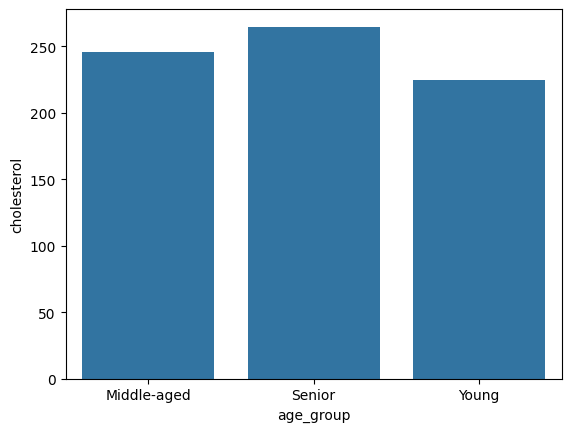

In [42]:
grouped1 = df.groupby('age_group') ['cholesterol'].mean().reset_index()
print(grouped1)
sns.barplot( x='age_group',y='cholesterol',data=grouped1)

<Axes: xlabel='sex', ylabel='count'>

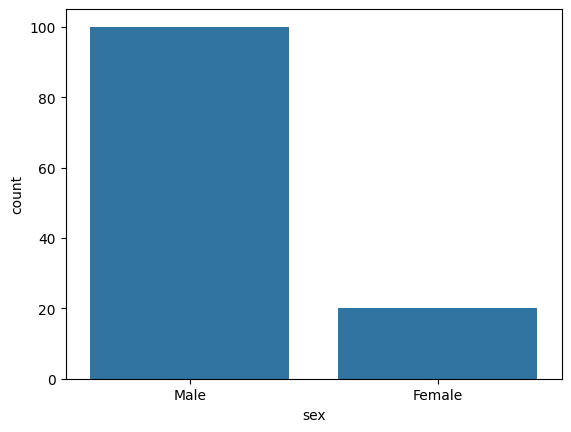

In [45]:
sns.countplot(data=df[df['heart disease'] == 1], x='sex')

In [47]:
def classify_cholesterol(chol):
    if chol < 200:
        return 'Normal'
    elif 200 <= chol <= 239:
        return 'Borderline High'
    else:
        return 'High'

# Apply function to create new column
df['cholesterol_level'] = df['cholesterol'].apply(classify_cholesterol)
df.head()


,age,sex,BP,cholesterol,heart disease,age_group,cholesterol_level
0,70,Male,130,322,1,Senior,High
1,67,Female,115,564,0,Senior,High
2,57,Male,124,261,1,Middle-aged,High
3,64,Male,128,263,0,Senior,High
4,74,Female,120,269,0,Senior,High


In [51]:
cholesterol_hd_counts = df.groupby(['cholesterol_level', 'heart disease']).size().unstack(fill_value=0)

print(cholesterol_hd_counts)

heart disease       0   1
cholesterol_level        
Borderline High    53  31
High               72  75
Normal             25  14
